In [7]:
from prophet import Prophet

In [10]:
import plotly.offline as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [11]:
data = pd.read_csv('train.csv')

In [74]:
data['id'] = pd.DatetimeIndex(data['id'])
data['day_of_week'] = data['id'].dt.day_name()
data

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,day_of_week
0,2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4,Wednesday
1,2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0,Wednesday
2,2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9,Wednesday
3,2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1,Wednesday
4,2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6,Wednesday
...,...,...,...,...,...,...,...
40986,2024-09-03 18:00:00,NaN,0.222,55.1,12.0,5.3,Tuesday
40987,2024-09-03 19:00:00,NaN,0.245,48.2,13.4,7.0,Tuesday
40988,2024-09-03 20:00:00,NaN,0.234,44.5,12.4,7.1,Tuesday
40989,2024-09-03 21:00:00,NaN,0.225,25.9,10.6,5.4,Tuesday


In [14]:
data_NO2 = data[['id', 'valeur_NO2']].copy()
data_NO2 = data_NO2.rename(columns={'id' : 'ds', 'valeur_NO2' : 'y'})

In [15]:
data_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40991 entries, 0 to 40990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      40991 non-null  datetime64[ns]
 1   y       37694 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 640.6 KB


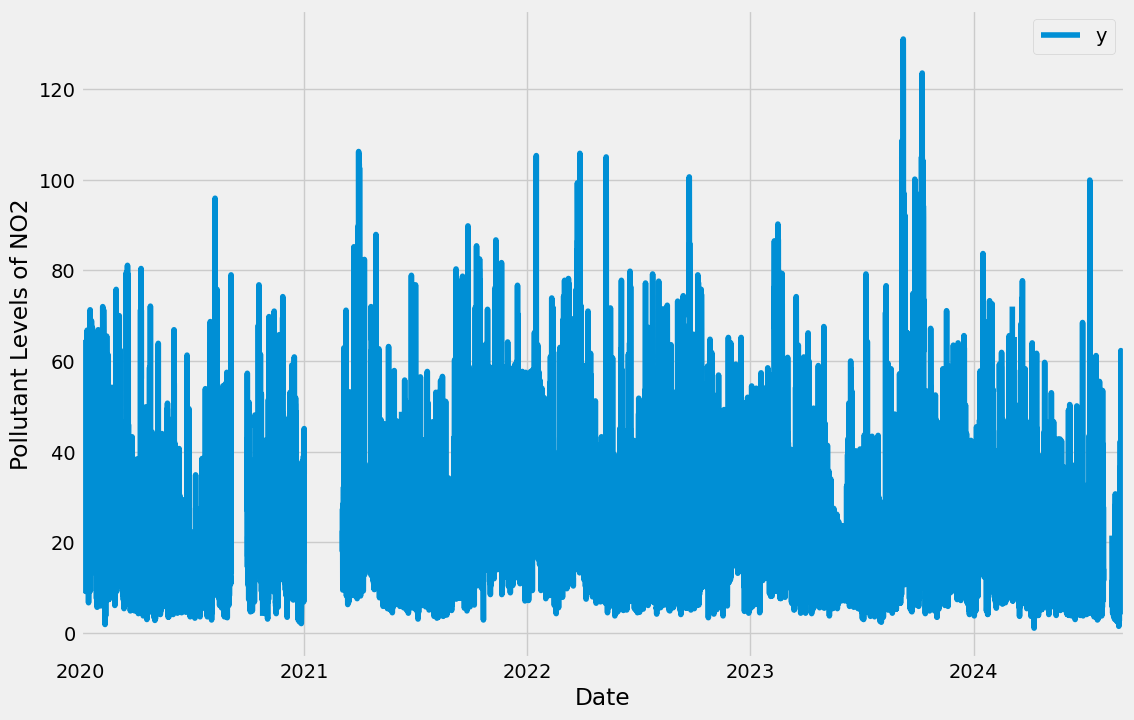

In [16]:
NO2 = data_NO2.set_index('ds').plot(figsize = (12, 8))
NO2.set_ylabel('Pollutant Levels of NO2')
NO2.set_xlabel('Date')

plt.show()

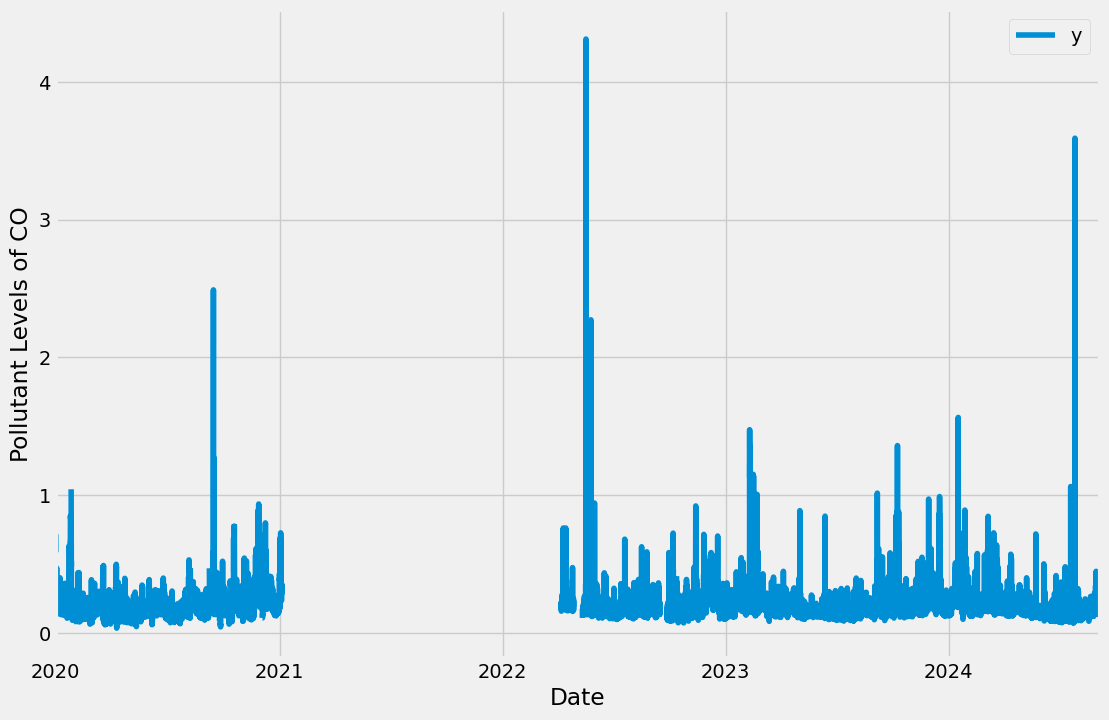

In [17]:
data_CO = data[['id', 'valeur_CO']].copy()
data_CO = data_CO.rename(columns={'id' : 'ds', 'valeur_CO' : 'y'})

CO = data_CO.set_index('ds').plot(figsize = (12, 8))
CO.set_ylabel('Pollutant Levels of CO')
CO.set_xlabel('Date')

plt.show()

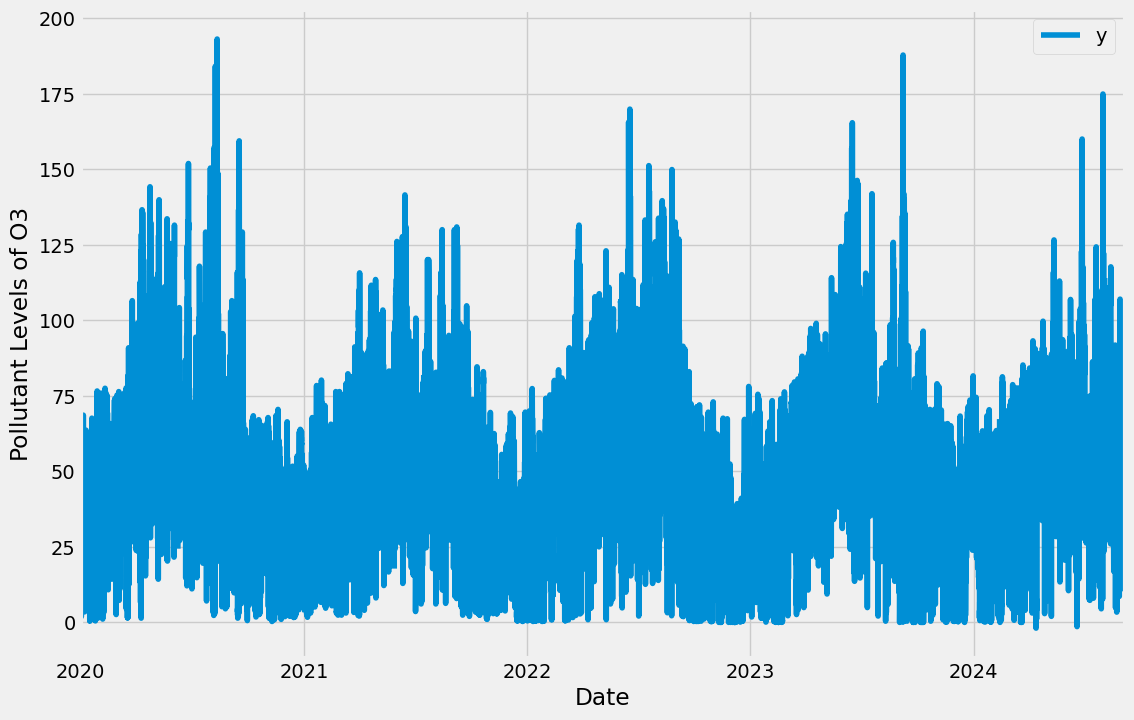

In [18]:
data_O3 = data[['id', 'valeur_O3']].copy()
data_O3 = data_O3.rename(columns={'id' : 'ds', 'valeur_O3' : 'y'})

O3 = data_O3.set_index('ds').plot(figsize = (12, 8))
O3.set_ylabel('Pollutant Levels of O3')
O3.set_xlabel('Date')

plt.show()

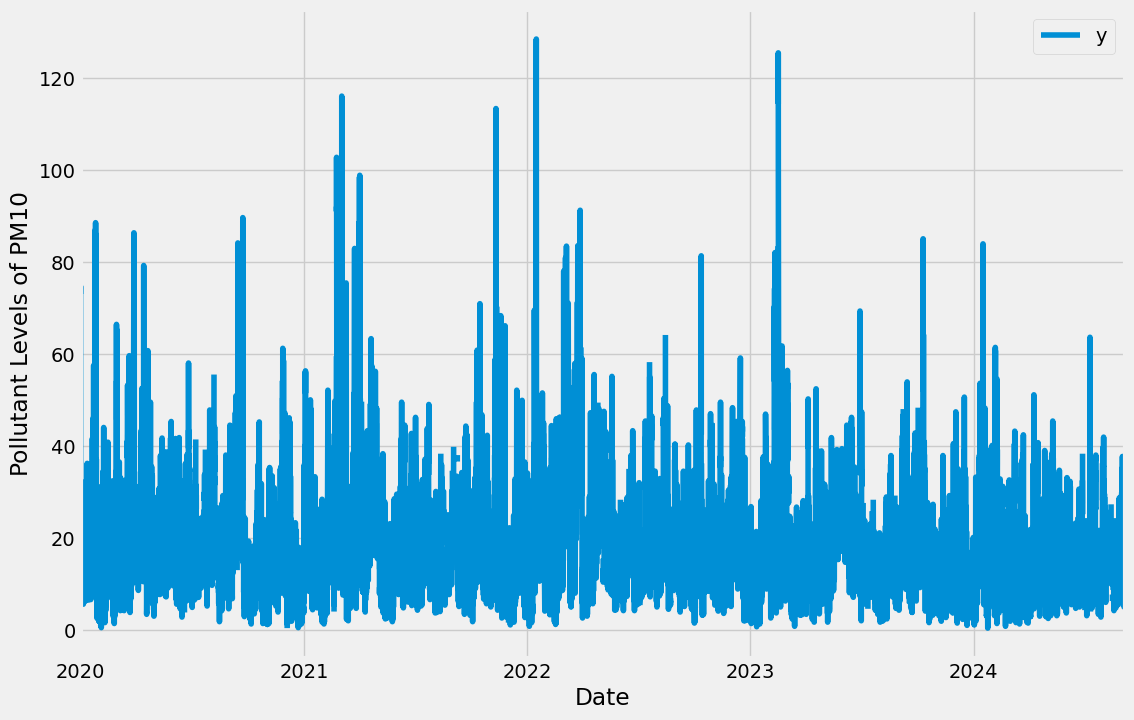

In [19]:
data_PM10 = data[['id', 'valeur_PM10']].copy()
data_PM10 = data_PM10.rename(columns={'id' : 'ds', 'valeur_PM10' : 'y'})

PM10 = data_PM10.set_index('ds').plot(figsize = (12, 8))
PM10.set_ylabel('Pollutant Levels of PM10')
PM10.set_xlabel('Date')

plt.show()

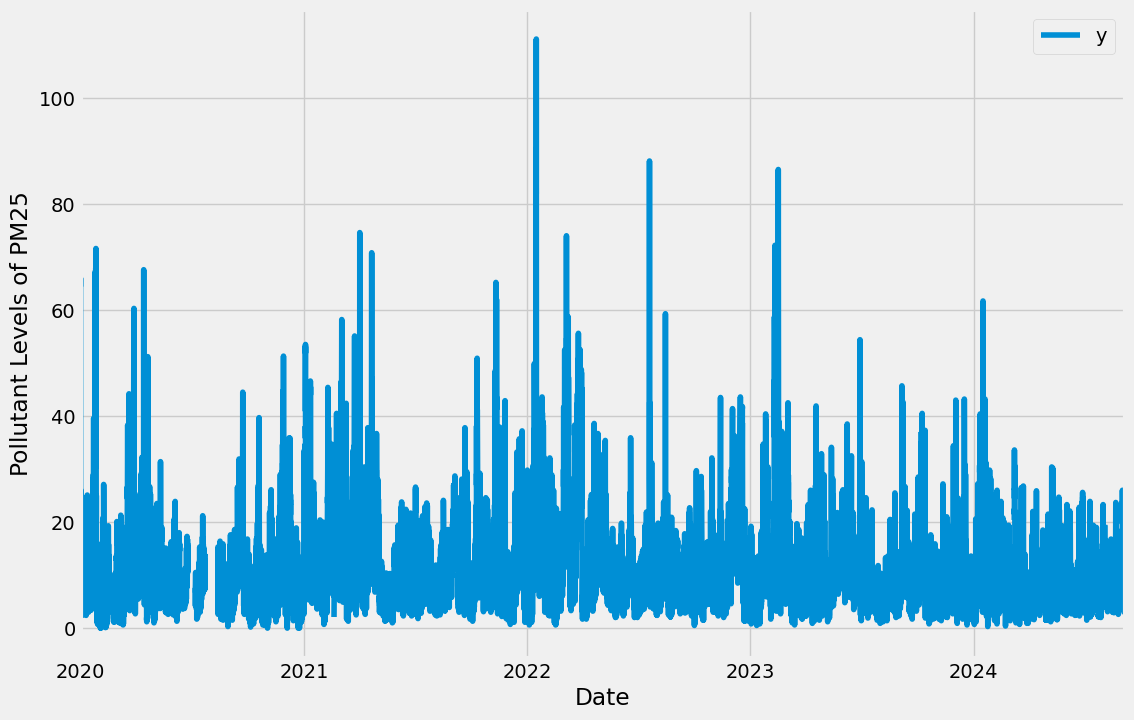

In [20]:
data_PM25 = data[['id', 'valeur_PM25']].copy()
data_PM25 = data_PM25.rename(columns={'id' : 'ds', 'valeur_PM25' : 'y'})

PM25 = data_PM25.set_index('ds').plot(figsize = (12, 8))
PM25.set_ylabel('Pollutant Levels of PM25')
PM25.set_xlabel('Date')

plt.show()

In [22]:
test = pd.read_csv('test.csv')
test.info()
test = test.rename(columns={'id' : 'ds'})

In [68]:
#define loss function 
def mae(y_true, y_pred):
    
    # Convert inputs to numpy arrays for easier calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the MAE
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

In [54]:
model1 = Prophet()
data_NO2_train, data_NO2_test= np.split(data_NO2, [int(.67 *len(data_NO2))])
model1.fit(data_NO2_train)

12:26:24 - cmdstanpy - INFO - Chain [1] start processing
12:26:42 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
data_NO2_test

,ds,y
27463,2023-02-18 07:00:00,13.1
27464,2023-02-18 08:00:00,11.1
27465,2023-02-18 09:00:00,12.2
27466,2023-02-18 10:00:00,13.3
27467,2023-02-18 11:00:00,12.2
...,...,...
40986,2024-09-03 18:00:00,NaN
40987,2024-09-03 19:00:00,NaN
40988,2024-09-03 20:00:00,NaN
40989,2024-09-03 21:00:00,NaN


In [65]:
test_forecast_NO2 = model1.predict(data_NO2_test)
test_forecast_NO2 = test_forecast_NO2.rename(columns = {'ds' : 'id', 'yhat' : 'valeur_NO2'})
test_forecast_NO2_new = test_forecast_NO2[['id', 'valeur_NO2']].copy()

In [66]:
test_forecast_NO2_new

,id,valeur_NO2
0,2023-02-18 07:00:00,38.020112
1,2023-02-18 08:00:00,35.455220
2,2023-02-18 09:00:00,31.174847
3,2023-02-18 10:00:00,27.055305
4,2023-02-18 11:00:00,24.225306
...,...,...
13523,2024-09-03 18:00:00,49.366459
13524,2024-09-03 19:00:00,50.585078
13525,2024-09-03 20:00:00,50.307299
13526,2024-09-03 21:00:00,49.132233


In [72]:
NO2_mae = mae(data_NO2_test['y'], test_forecast_NO2_new['valeur_NO2'])
NO2_mae

nan

In [ ]:
forecast_NO2 = model.predict(test)
forecast_NO2 = forecast_NO2.rename(columns = {'ds' : 'id', 'yhat' : 'valeur_NO2'})
predictions_NO2 = forecast_NO2[['id', 'valeur_NO2']].copy()
predictions_NO2

In [38]:
model2 = Prophet()
model2.fit(data_CO)
forecast_CO = model2.predict(test)
forecast_CO = forecast_CO.rename(columns = {'ds' : 'id', 'yhat' : 'valeur_CO'})
predictions_CO = forecast_CO[['id', 'valeur_CO']].copy()

11:48:57 - cmdstanpy - INFO - Chain [1] start processing
11:49:08 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2024-09-03 23:00:00,0.197064,0.077585,0.319637
1,2024-09-04 00:00:00,0.190526,0.081725,0.303849
2,2024-09-04 01:00:00,0.184249,0.066768,0.305043
3,2024-09-04 02:00:00,0.177302,0.074146,0.293855
4,2024-09-04 03:00:00,0.172693,0.056974,0.290155


In [40]:
model3 = Prophet()
model3.fit(data_CO)
forecast_O3 = model3.predict(test)
forecast_O3 = forecast_O3.rename(columns = {'ds' : 'id', 'yhat' : 'valeur_O3'})
predictions_O3 = forecast_O3[['id', 'valeur_O3']].copy()

11:54:27 - cmdstanpy - INFO - Chain [1] start processing
11:54:38 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
model4 = Prophet()
model4.fit(data_PM10)
forecast_PM10 = model4.predict(test)
forecast_PM10 = forecast_PM10.rename(columns = {'ds' : 'id', 'yhat' : 'valeur_PM10'})
predictions_PM10 = forecast_PM10[['id', 'valeur_PM10']].copy()

11:54:44 - cmdstanpy - INFO - Chain [1] start processing
11:55:28 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
model5 = Prophet()
model5.fit(data_PM25)
forecast_PM25 = model5.predict(test)
forecast_PM25 = forecast_PM25.rename(columns = {'ds' : 'id', 'yhat' : 'valeur_PM25'})
predictions_PM25 = forecast_PM25[['id', 'valeur_PM25']].copy()

11:55:36 - cmdstanpy - INFO - Chain [1] start processing
11:56:11 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
final_predictions = (
    predictions_NO2.merge(predictions_CO, on='id')
       .merge(predictions_O3, on='id')
       .merge(predictions_PM10, on='id')
       .merge(predictions_PM25, on='id')
)

In [51]:
final_predictions['id'] = final_predictions['id'].dt.strftime('%Y-%m-%d %H')
final_predictions

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2024-09-03 23,19.709247,0.197064,0.197064,16.595705,10.048533
1,2024-09-04 00,17.650554,0.190526,0.190526,16.306446,9.864295
2,2024-09-04 01,15.569385,0.184249,0.184249,16.178546,9.804966
3,2024-09-04 02,14.441576,0.177302,0.177302,15.887266,9.663101
4,2024-09-04 03,15.412204,0.172693,0.172693,15.500532,9.455140
...,...,...,...,...,...,...
499,2024-09-24 18,29.386708,0.254987,0.254987,16.220321,11.413558
500,2024-09-24 19,30.776400,0.265687,0.265687,16.811910,12.229621
501,2024-09-24 20,30.636680,0.266316,0.266316,16.924609,12.396023
502,2024-09-24 21,29.488649,0.258383,0.258383,16.368456,11.945688


In [53]:
final_predictions.to_csv('final_predictions.csv', index = False)